# Reference Data
### The Quest for Raw Signals:<br>A Quality Review of Publicly Available Photoplethysmography Datasets

Florian Wolling<br>
Ubiquitous Computing Lab<br>
https://ubicomp.eti.uni-siegen.de<br>
University of Siegen, Germany<br>

### Citation
"[The Quest for Raw Signals: A Quality Review of Publicly Available Photoplethysmography Datasets](https://ubicomp.eti.uni-siegen.de/home/datasets/data20/index.html.en)", <a href="https://ubicomp.eti.uni-siegen.de/home/team/fwolling.html.en" target="_blank">Florian Wolling</a> and <a href="https://ubicomp.eti.uni-siegen.de/home/team/kristof.html.en" target="_blank">Kristof Van Laerhoven</a>. In *DATA'20: Proceedings of the 3rd Workshop on Data Acquisition To Analysis, DATA 2020, Virtual Event, Japan, November 2020*, ACM, 2020. <a href="https://doi.org/10.1145/3419016.3431485" target="_blank">https://doi.org/10.1145/3419016.3431485</a>

### Disclaimer
You may use the source code of the developed analytical tool *PPGraw* for scientific, non-commercial purposes, provided that you give credit to the owners when publishing any work based on it. We would also be very interested to hear back from you if you use our tool or metrics in any way and are happy to answer any questions or address any remarks related to it.

<br>
<b>Version 1.0</b> (November 2020)

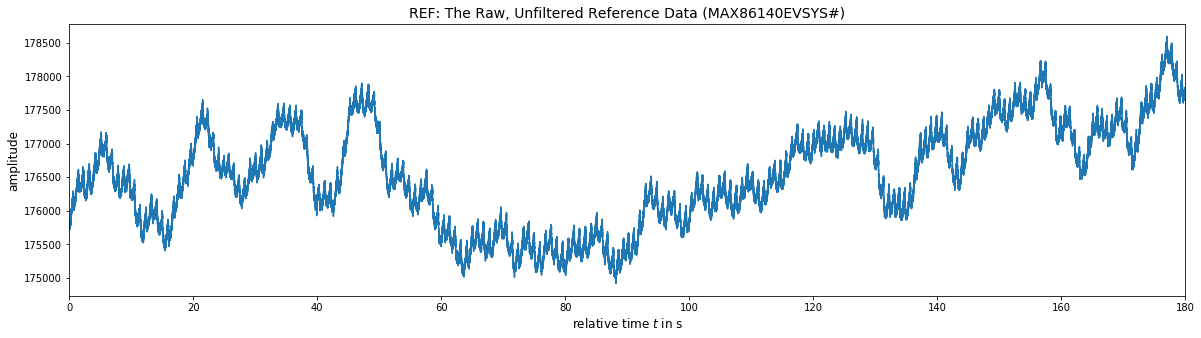

In [5]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Load the reference data.
file = "ref_sample.p"
dataset = pickle.load(open(str(file), "rb"), encoding="latin1")

# Plot the reference data.
width, height = (20, 5)
fig=plt.figure(figsize=(width, height))
ax=plt.axes()
ax.set_title("REF: The Raw, Unfiltered Reference Data (MAX86140EVSYS#)", fontsize=14)
ax.set_xlabel("relative time $t$ in s", fontsize=12)
ax.set_ylabel("amplitude", fontsize=12)
ax.set_xlim((0.0, 180.0))
ax.plot(dataset["time"], dataset["signal"])
plt.show()